# Import Modules

In [16]:
import pandas as pd

import utils

# Load Data

In [17]:
target_vegetable = "にんじん"

In [18]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=4000, T=10)

# Training

In [19]:
pred_y = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=374, num_epochs=100)

training loss = 0.9926041960716248
test loss = 0.7981950640678406
training loss = 0.49129757285118103
test loss = 0.7943710088729858
training loss = 0.30020272731781006
test loss = 2.802647113800049
training loss = 0.26791954040527344
test loss = 0.6812314391136169
training loss = 0.2603303790092468
test loss = 0.6187685132026672
training loss = 0.2643801271915436
test loss = 0.6941888332366943
training loss = 0.26766178011894226
test loss = 1.8164762258529663
training loss = 0.2551492750644684
test loss = 0.7077707648277283
training loss = 0.25395458936691284
test loss = 0.7755576372146606
training loss = 0.25006839632987976
test loss = 0.6690689325332642


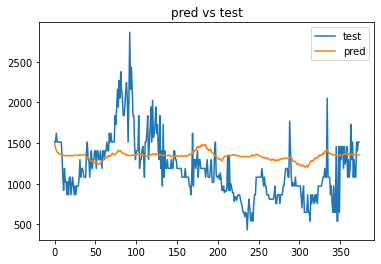

In [20]:
utils.plot_prediction(pred_y, test_y, ss)